---
title: Orthodox Statistics
layout: collection
permalink: /Computational-Biology/Orthodox-Statistics
collection: Computational-Biology
mathjax: true
toc: true
categories:
  - study
tags:
  - mathematics
  - statistics
---

In [4]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In orthodox statistics, or the frequency interpretation of probabilities, the probabilites only apply to variables that are random. Observations are considered random, whereas the parameter may be unknown but not random. Probabilities of a Random variable correspond to the frequency of occurrence in an infinite number of repetitions of the random experiment.

In the bayesian approach the data $\mathcal{D}$ are taken as given and probabilites are assigned to the parameter values $\theta$ based on their relative likelihoods of producing the observed data (Bayesian formula).

### P-value of a hypothesis test

Assume we observe a dataset $\mathcal{D}$with relatively large value like $m=9$. Assume we're in the setting of a hypergeometric distribution $\mathbb{P}(m | m, N, M)$,m where we have a population size of $N$, where we ahve $M$ mutants, we sample $n$ individuals from this population, m here is then the probability of observing m mutants in our sample size of $n$. The question then may be, for a given $M$, how likely is it that we get $m = 9$?
This can be estimated by the p-value, which gives us a probability of obtaining test results which are atleast as extreme as the observed results.
For our $m = 9$ we than want to ask, whats the probability of observing atleast $m = 9$, which is given by:

$$
\mathbb{P}(m \geq 9 | n, N, M)
$$

This is called the one tailed test where we look only at one side of our distribution. We calculate our p-value given our data $\mathcal{D}$ under a hypothisis of a parameter $\theta$, it then the given p-value is to low, we reject this parameter as a possible solution to our distribution.

The p-value then basically looks at, if $M$ was fixed, what would be the probability of observing our data. 
In the bayesian approach we would look at the data and check what would be the probability of a fixed $M$ given our data.

### Estimation of M

Assume we have $N=500$, $n = 7$ and $m=2$, we would then like to estimate our 95% intervall, $[M_{min}, M_{max}]$ where $M$ may lie in. To calculate this we can use the bayes formula using a uniform prior:

$$
\mathbb{P}(M | n, N, m) = \frac{\mathbb{P}(m | n, N, M)}{\sum_{M=0}^N \mathbb{P}(m | n, N, M)}
$$

We can then calculate our range of $M$ by calculating the left tail and right tail probabilities

$$
\mathbb{P}(M \leq M_{min} | m, n, N) = 0.025 \quad \text{and} \quad \mathbb{P}(M \geq M_{max} | m, n, N) = 0.975
$$

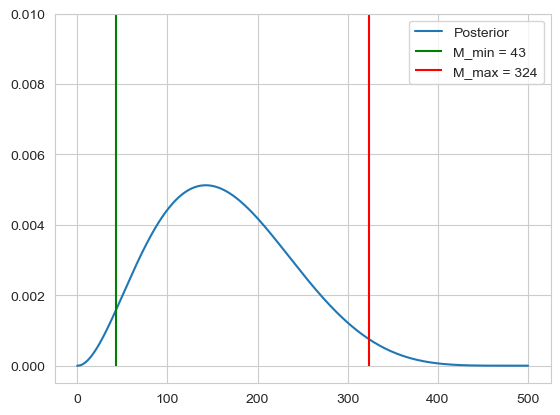

In [32]:
N = 500
n = 7
m = 2
M = np.arange(0, 501, 1)

hyper = sp.stats.hypergeom(N, M, n)
prob = hyper.pmf(m)

post = prob / np.sum(prob)
density = np.cumsum(post)

M_min = np.argmax(density > 0.025)
M_max = np.argmax(density > 0.975)

plt.plot(M, post, label='Posterior')
plt.vlines(ymin=-0, ymax=0.1, x=M_min, label=f'M_min = {M_min}', color='green')
plt.vlines(ymin=-0, ymax=0.1, x=M_max, label=f'M_max = {M_max}', color='red')
plt.ylim([-0.0005, 0.01])
plt.legend()
plt.show()

Using the orthodox approach for the estimation of $M$, because $M$ is not seen as random,  we can only look at a spceific distribution for a fixed $M$. 
So for a given $M$ we can find all $m$ which would not reject the hypothisis that $M$ has this value.
The idea is then, to find on both sides the most extreme value of $M$ for which the given $m$ doesn't reject the hypothisis.

In [108]:
N = 500
n = 7
m = 2
M = np.arange(0, 501, 1)
intervall = []
m_min_check = True
m_max_check = True

for M_i in np.flip(M):
    hyper = sp.stats.hypergeom(N, M_i, n)
    prob = hyper.pmf(M)
    m_max = np.argmax(np.cumsum(prob) >= 0.025)
    if m_max <= m:
        intervall.append(M_i)
        break

for M_i in M:
    hyper = sp.stats.hypergeom(N, M_i, n)
    prob = hyper.pmf(M)
    m_min = np.argmax(np.cumsum(prob) >= 0.025)
    if m_min > m:
        intervall.append(M_i)
        break
        


print(intervall)

[353, 354]


The frequency interpretation of the confidence intervall is that if we repeat an experiment many times, each time sampling M out of the total N and we then sample n times and observe m, then the confidence intervall will cover $M$ 95 % of the time.

The bayesian posterior probability interval is that the intervall is correct 95 % f the time when averaged over many datasets.

### Pathology of the confidence intervall

imagine we have the data of a Salmonella infection with infection days: $\mathcal{D} = \{12, 14, 16\}$, and we know that if one eats salmonella infected food at $t_0$, the probability to get sick at time t is given by an exponential distribution $\mathbb{P}(t | t_0, \tau, I)dt = \frac{\theta(t-t_0)}{\tau}e^{-(t - t_0)/\tau}$, here we set $\tau = 1$. Using a uniform prior, we can calculate our likelihood as:

$$
\prod_{i = 0}^{2} \left[ \theta(t_i-t_0)e^{-(t_i - t_0)} \right] = \theta(t_i-t_0) \theta(t_i-t_0) \theta(t_i-t_0) e^{-\sum_{i = 0}^2 (t_i - t_0)} = \theta(
\min(t_i)-t_0) e^{-\sum_{i = 0}^2 (t_i - t_0)}
=
\theta(\min(t_i)-t_0) e^{-3 (\bar{t} - t_0)}
$$

The posterior is then:

$$
\frac{\theta(\min(t_i)-t_0) e^{-3 (\bar{t} - t_0)}}{\int_{-\infty}^{\min(t_i)}e^{-3 (\bar{t} - t)}dt} 
= 
\frac{\theta(\min(t_i)-t_0) e^{-3 (\bar{t} - t_0)}}{\frac{1}{3} e^{-3 (\bar{t} - \min(t_i))}dt} = 3 \theta(\min(t_i)-t_0) e^{-3 (\min(t_i) - t_0)}
$$

For the confidence, we note that $t_0$ cant be bigger than 12, so we get $t_{max} = 12$, for $t_{min}$ we calculate

$$
\mathbb{P}(t_0 \geq t | D, I) = \int_{t_{min}}^{\min(t_i)} 3e^{-3(\min(t_1) - t_0)} dt_0= e^{-3(\min(t_1) - t_0)} \Bigr|_{t_{min}}^{\min(t_i)} = 1 - e^{-3(\min(t_i) - t_{min})} \Rightarrow t_{min} = \min(t_i) - 1 \overset{!}{=} 0.95 \\
\Rightarrow t_{min} = 11
$$

Thus we get our intervall of $[t_{min}, t_{max}] = [11, 12]$.

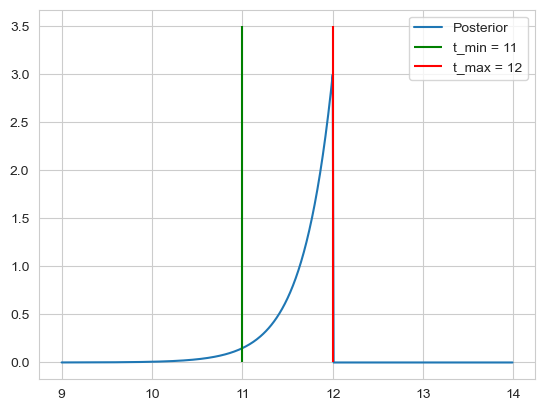

In [126]:
D = [12, 14, 16]
t = np.arange(9, 14, 0.01)
theta = (t <= min(D)) + 0

post = 3 * theta * np.exp(-3 * (min(D) - t))

plt.plot(t, post, label='Posterior')
plt.vlines(ymin=0, ymax=3.5, x=11, label=f't_min = {11}', color='green')
plt.vlines(ymin=0, ymax=3.5, x=12, label=f't_max = {12}', color='red')
plt.legend()
plt.show()